In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [2]:
image_path = './roads/train/raw/BLD00001_PS3_K3A_NIA0276.png'

In [3]:
json_path = './roads/train/label/BLD00001_PS3_K3A_NIA0276.json'

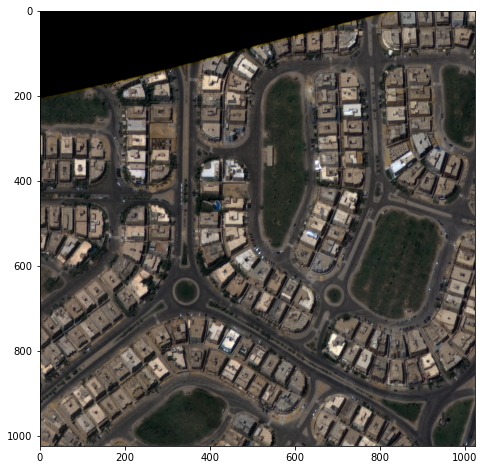

In [4]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
image = imread(image_path)
plt.imshow(image)

In [5]:
with open(json_path) as f:
    json_file = json.load(f)
    print(json.dumps(json_file, indent=2))

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            31.4347031225,
            30.0413951468,
            0.0
          ],
          [
            31.4405428056,
            30.0414645232,
            0.0
          ],
          [
            31.4404632046,
            30.0465452603,
            0.0
          ],
          [
            31.4346232236,
            30.0464758698,
            0.0
          ]
        ],
        "type": "Polygon"
      },
      "properties": {
        "object_imcoords": "EMPTY",
        "building_imcoords": "EMPTY",
        "road_imcoords": "1024,925.5097910406106,992.6393195670636,1024,1010.5189248491496,1024,1024,982.7142073505212",
        "image_id": "BLD00001_PS3_K3A_NIA0276.png",
        "ingest_time": "2020-11-05T06:40:40.855682Z",
        "type_id": "2",
        "type_name": "Primary"
      },
      "type": "Feature"
    },
    {
      "geometry": {
        "coordinates": [
          [
            31.4347031225

## Polygon 그리기

In [12]:
bg = np.zeros((1024, 1024, 3), np.uint8)

In [3]:
img = cv2.polylines(bg, polygon_list, True, (255, 255, 255))

NameError: name 'polygon_list' is not defined

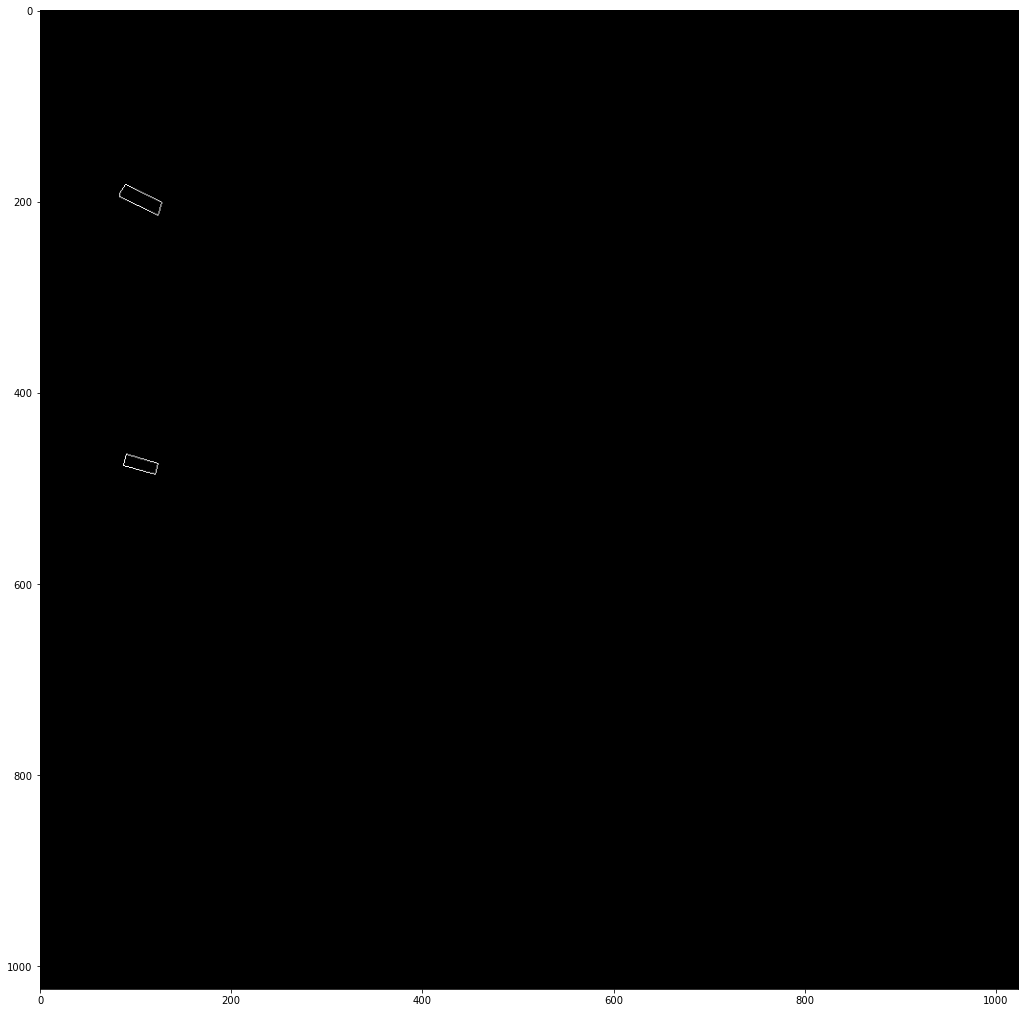

In [221]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(img)

In [47]:
image_path = './roads/val/raw/'
label_path = './roads/val/label/'

In [48]:
image_files = glob.glob(image_path + '*.png')
json_files = glob.glob(label_path + '*.json')

In [49]:
image_files.sort()
json_files.sort()

In [50]:
label_dict = {}

In [51]:
def parse_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['road_imcoords']:
            polygon = list(map(float, feature['properties']['road_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

In [52]:
def show_label(image_path, label_path, polygon_list):
        fig = plt.figure(figsize=(18, 8))
        plt.subplot(1, 2, 1)
        image = imread(image_path)
        bg = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        # bg_img = cv2.polylines(bg, polygon_list, True, (255, 255, 255))
        img = cv2.fillPoly(image, polygon_list, (255, 255, 255))
        bg_img = cv2.fillPoly(bg, polygon_list, (255, 255, 255))
        plt.imshow(img)
        plt.subplot(1, 2, 2)
        plt.imshow(bg_img)

In [53]:
def draw_label(image_path, label_path, polygon_list):
        filename = os.path.splitext(os.path.basename(image_path))[0]
        savepath = './roads/val/roads_new_label_val/'
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        img = cv2.fillPoly(image, polygon_list, (255, 255, 255))
        img = Image.fromarray(img)
        img.save(f'{savepath}{filename}.png')오염수 방류
        print(f'{savepath}{filename}.png saved!')

In [54]:
def check_filename(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

In [55]:
for i in range(len(image_files)):
    image_path = image_files[i]
    json_path = json_files[i]
    if check_filename(image_path) == check_filename(json_path):
        with open(json_path) as f:
            json_file = json.load(f)
            polygon_list, label_list = parse_json(json_file)
            # show_label(image_path, label_path, polygon_list)
            draw_label(image_path, label_path, polygon_list)
    else:
        print("filename Different!")

./roads/val/roads_new_label_val/BLD00002_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00010_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00029_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00047_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00072_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00086_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00092_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00097_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00108_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00119_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00120_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00153_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00169_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00171_PS3_K3A_NIA0276.png saved!
./roads/val/roads_new_label_val/BLD00173_PS3_K3A

./roads/val/roads_new_label_val/BLD11474_PS3_K3A_NIA0390.png saved!
./roads/val/roads_new_label_val/BLD11611_PS3_K3A_NIA0390.png saved!
./roads/val/roads_new_label_val/BLD11785_PS3_K3A_NIA0391.png saved!
./roads/val/roads_new_label_val/BLD11907_PS3_K3A_NIA0391.png saved!
./roads/val/roads_new_label_val/BLD12071_PS3_K3A_NIA0391.png saved!


In [41]:
image_files

[]

In [59]:
len(image_files)

1238